# Data Exploration for Dandiset 001363

**NOTE: This notebook was automatically generated by an AI tool `dandi-notebook-gen` and has not been fully verified. Researchers should carefully review code and interpretations.**

---

## Dataset: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**Dandiset ID:** 001363 (Draft Version)

**Description:**  
This Dandiset contains extracellular electrophysiology recordings from the rat somatosensory cortex during transcranial focused ultrasound stimulation (tFUS). The data were collected with an ultraflexible nanoelectrode array, under varying ultrasound pressures (100-1300 kPa), duty cycles, and pulse repetition frequencies, to investigate neuronal responses.

**Contributors:**  
Ramachandran, Gao, Yu, Yeh, He (Carnegie Mellon University)  
NIH Grants: RF1NS131069, R01 NS124564

**License:** CC-BY-4.0  

**Keywords:** extracellular electrophysiology, ultrasound neuromodulation, rats, somatosensory cortex

### Contents:
- Multi-channel raw extracellular data (ElectricalSeries, 32 channels)
- Trial annotations for 500 tFUS trials
- Metadata: subject, devices, electrodes

---

## How to use this notebook
This example guides you through:
- Accessing Dandi datasets using API
- Loading NWB files remotely
- Inspecting metadata, trial info, device info
- Visualizing trial timing events

> **Disclaimer:** This notebook is an educational starting point. Dataset is large (GBs), so data loading is selective.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Number of assets in this Dandiset: {len(assets)}")
for asset in assets[:5]:
    print(asset.path)

Number of assets in this Dandiset: 55
sub-BH643/sub-BH643_ecephys.nwb
sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Select an NWB File to Explore
This notebook uses a single NWB file as an example:

`sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()
print("NWB file loaded successfully.")

NWB file loaded successfully.


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Subject and Metadata

In [3]:
sub = nwb.subject
print("Subject ID:", sub.subject_id)
print("Species:", sub.species)
print("Age:", sub.age)
print("Sex:", sub.sex)
print("Institution:", nwb.institution)
print("Session Start Time:", nwb.session_start_time)

Subject ID: BH589
Species: Rattus norvegicus
Age: P24W
Sex: M
Institution: Carnegie Mellon University
Session Start Time: 2024-08-27 16:04:57-04:00


## Devices & Electrodes

In [4]:
for dev_name, dev in nwb.devices.items():
    print(f"Device: {dev_name}, Description: {dev.description}, Manufacturer: {dev.manufacturer}")

elec_table = nwb.electrodes
print("Electrodes table columns:", elec_table.colnames)
print("Number of electrodes:", len(elec_table.id))

Device: array, Description: NET probe flexible electrode, Manufacturer: Xie Lab Rice University
Electrodes table columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')
Number of electrodes: 32


## Dandiset Experimental Trials
The experiment included 500 tFUS stimulation trials.

In [5]:
trials = nwb.trials
print(f"Number of trials: {len(trials)}")
print("Trial columns:", trials.colnames)

Number of trials: 500
Trial columns: ('start_time', 'stop_time')


### Visualize Trial Start/Stop Times

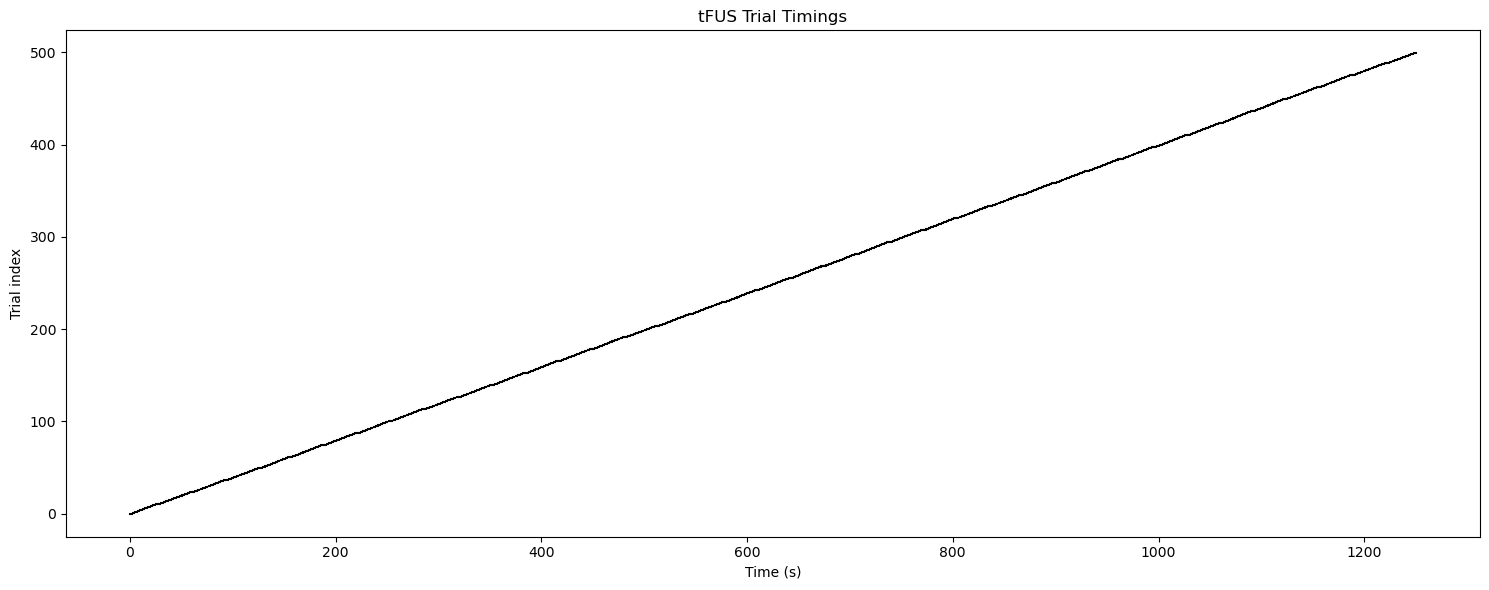

In [6]:
import matplotlib.pyplot as plt

start_times = trials['start_time'].data[:]
stop_times = trials['stop_time'].data[:]

plt.figure(figsize=(15, 6))
for idx in range(len(start_times)):
    plt.plot([start_times[idx], stop_times[idx]], [idx, idx], color='black')

plt.xlabel('Time (s)')
plt.ylabel('Trial index')
plt.title('tFUS Trial Timings')
plt.tight_layout()
plt.show()

The raster plot demonstrates that trials are consistent in duration and evenly spaced, matching the experimental design.

## Accessing Extracellular Data
This file contains one `ElectricalSeries` object with shape (millions of samples, 32 channels), sampled at 24.4 kHz.

Caution: The data are large; here is code to selectively retrieve small segments for analysis.

In [7]:
es = nwb.acquisition["ElectricalSeries"]
rate = es.rate
print(f"Sampling rate: {rate} Hz")
print(f"Data shape (samples x channels): {es.data.shape}")

Sampling rate: 24414.0625 Hz
Data shape (samples x channels): (31084544, 32)


### Example: Load and plot a small segment of raw traces

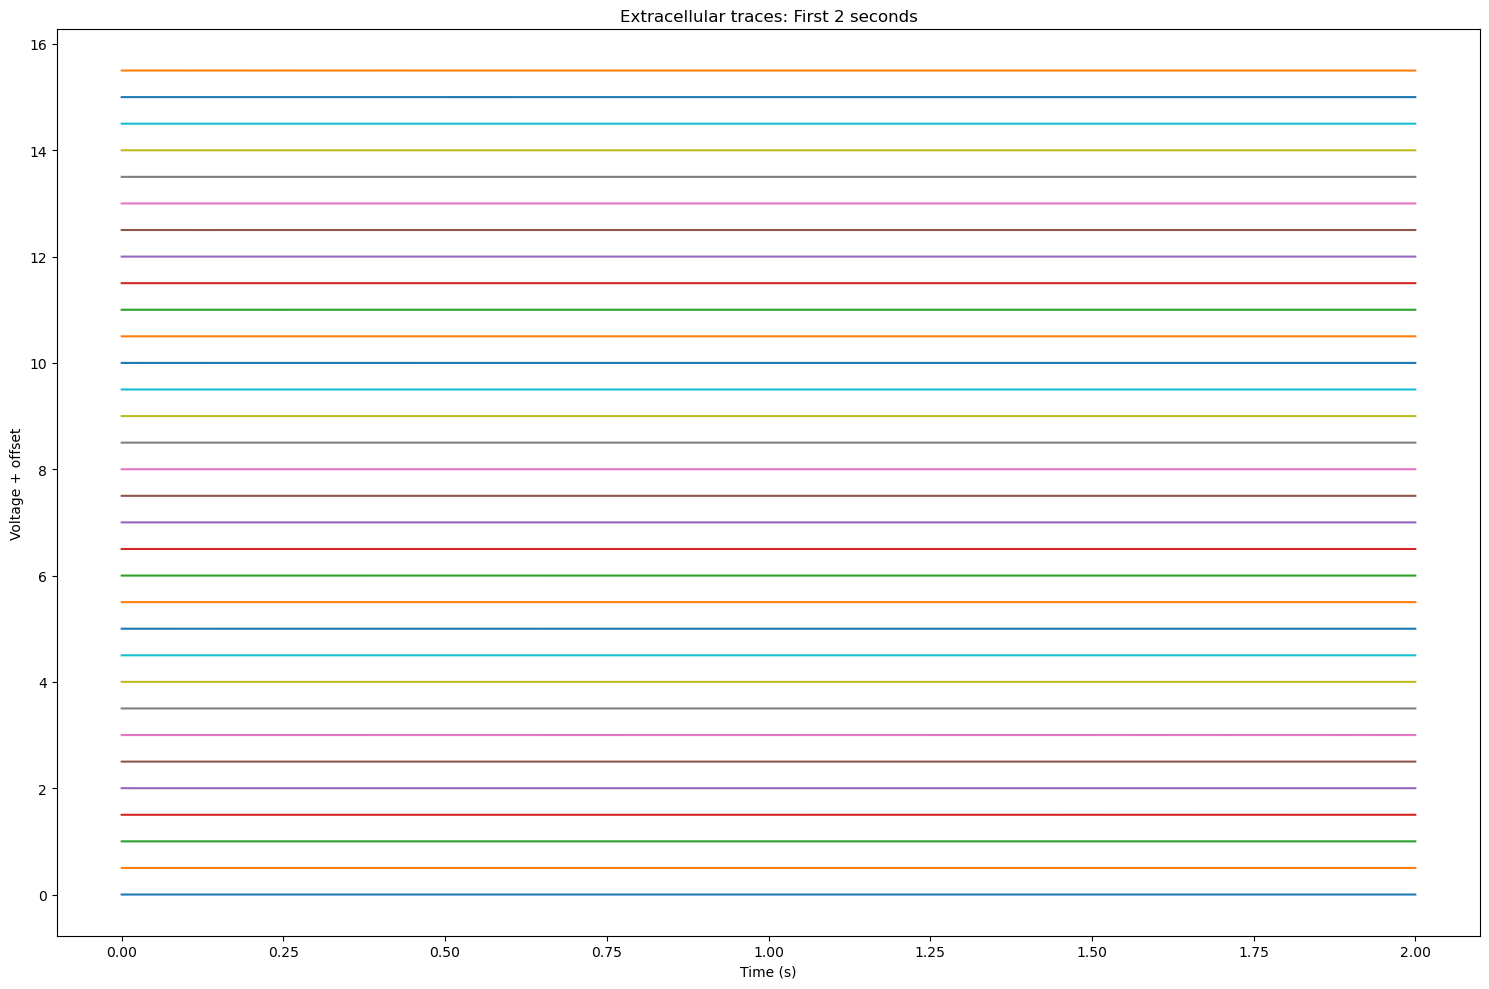

In [8]:
import numpy as np

duration_sec = 2  # Duration to load (seconds)
start_time_sec = 0  # Starting from recording start

start_sample = int(start_time_sec * rate)
num_samples = int(duration_sec * rate)

# Clamp to available data length
num_samples = min(num_samples, es.data.shape[0] - start_sample)

data_segment = es.data[start_sample:start_sample + num_samples, :]

time_vec = np.arange(num_samples) / rate

plt.figure(figsize=(15, 10))
offset = 0
for ch in range(es.data.shape[1]):
    plt.plot(time_vec, data_segment[:, ch] + offset)
    offset += 0.5  # offset to separate channels

plt.xlabel("Time (s)")
plt.ylabel("Voltage + offset")
plt.title("Extracellular traces: First 2 seconds")
plt.tight_layout()
plt.show()

**Note:** Based on preliminary exploration, these raw extracellular traces may appear flat, possibly due to experimental state or recording setup. Users should investigate further or explore different segments/files if necessary.

## Summary
This notebook provided:
- Metadata overview of a neuroscience Dandiset
- Loading NWB objects remotely
- Inspection of subjects, devices, electrodes
- Visualization of trial timing structure
- Access and visualization of large raw extracellular data arrays

Researchers can extend this exploration by:
- Performing spike sorting offline
- Analyzing evoked responses to different ultrasound parameters
- Combining data from multiple NWB files
- Applying advanced statistical analyses

---
**Generated automatically with AI. Please verify all workflows and interpretations before publication.**